In [2]:
#Import important library for data cleaning,EDA and Making Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cal
from pandas.api.types import CategoricalDtype as cdt

from sklearn.preprocessing import StandardScaler

In [3]:
#Load the dataset for Analysis
property_data=pd.read_csv('F:\Data Science Course\Capestone Project\\Property_data.csv')
property_data

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,...,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
property_data.head(20)

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,PropertyFooting,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,Heating,HeatingEfficiency,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementType,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon

In [6]:
property_data.shape

(1460, 81)

In [7]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [8]:
int_features=property_data.select_dtypes(include=['int64']).columns
print("Integer Feature columns names: ",int_features.tolist())

Integer Feature columns names:  ['PropertyID', 'PropertyClass', 'PropertySize', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmntFinSty1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1', 'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'CntRmsUpLev', 'CntFireplaces', 'BasementCars', 'BasementSqFootage', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AddVal', 'SaleMon', 'SaleYr', 'PropPrice']


In [9]:
float_features=property_data.select_dtypes(include=['float64']).columns
print("Float Feature columns names: ",float_features.tolist())

Float Feature columns names:  ['PropertyFrontage', 'ExteriorCladdingArea', 'BasementYrBlt']


In [10]:
Object_features=property_data.select_dtypes(include=['object']).columns
print("Object Feature columns names: ",Object_features.tolist())

Object Feature columns names:  ['PropertyZone', 'Street', 'Alley', 'PropertyShape', 'Elevation', 'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'PropertyStyle', 'RoofStyle', 'RoofMatl', 'Roof1Material', 'Roof2Material', 'ExteriorCladdingType', 'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish', 'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinQual1', 'Heating', 'HeatingEfficiency', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'QualFireplace', 'BasementType', 'BasementFinish', 'BasementQual', 'BasementCond', 'PavedDrive', 'PoolQC', 'BoundaryFeatures', 'AddFeatures', 'SaleType', 'SaleCondn']


### Get the statistical information of Numerical Features

In [11]:
property_data.describe()

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
property_data.describe().shape

(8, 38)

#### Handling Null/Missing Value With heatmap fuction

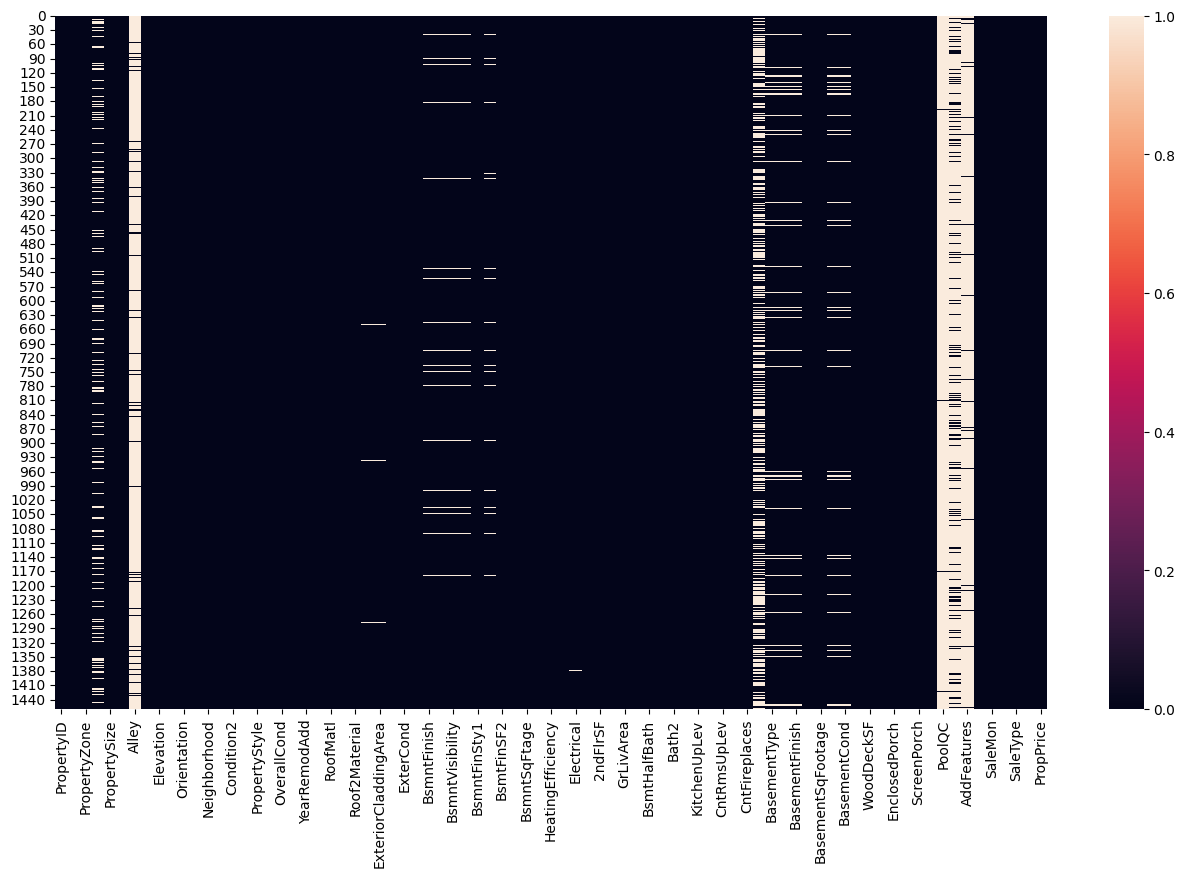

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(property_data.isnull())
plt.savefig('F:\\Data Science Course\\Capestone Project\\heatmap_null_value.png')

In [14]:
#Find the null rows in data set
property_data.isnull().sum()

PropertyID                 0
PropertyClass              0
PropertyZone               0
PropertyFrontage         259
PropertySize               0
Street                     0
Alley                   1369
PropertyShape              0
Elevation                  0
Amenities                  0
Orientation                0
Grade                      0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
PropertyStyle              0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
RoofStyle                  0
RoofMatl                   0
Roof1Material              0
Roof2Material              0
ExteriorCladdingType       8
ExteriorCladdingArea       8
ExterQual                  0
ExterCond                  0
PropertyFooting            0
BsmntFinish               37
BsmntMaintenance          37
BsmntVisibility           38
BsmntFinRat1              37
BsmntFinSty1  

In [15]:
#Find the null rows in data set
Null_percent=property_data.isnull().sum()/property_data.shape[0]*100
Null_percent

PropertyID               0.000000
PropertyClass            0.000000
PropertyZone             0.000000
PropertyFrontage        17.739726
PropertySize             0.000000
Street                   0.000000
Alley                   93.767123
PropertyShape            0.000000
Elevation                0.000000
Amenities                0.000000
Orientation              0.000000
Grade                    0.000000
Neighborhood             0.000000
Condition1               0.000000
Condition2               0.000000
BldgType                 0.000000
PropertyStyle            0.000000
OverallQual              0.000000
OverallCond              0.000000
YearBuilt                0.000000
YearRemodAdd             0.000000
RoofStyle                0.000000
RoofMatl                 0.000000
Roof1Material            0.000000
Roof2Material            0.000000
ExteriorCladdingType     0.547945
ExteriorCladdingArea     0.547945
ExterQual                0.000000
ExterCond                0.000000
PropertyFootin

#### Find Blank Columns/Features for removing/imputing

In [16]:
# As per Observation Will not drop those feature instead none value and will add constant value "NA"
missing_percent=Null_percent[Null_percent>50]
missing_percent

Alley               93.767123
PoolQC              99.520548
BoundaryFeatures    80.753425
AddFeatures         96.301370
dtype: float64

In [17]:
property_data['AddFeatures'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: AddFeatures, dtype: int64

In [18]:
# As per Observation Will not drop QualFireplace feature instead none value we will add constant value "NA"
missing_20_50_percent=Null_percent[(Null_percent>20)&(Null_percent<51)]
missing_20_50_percent

QualFireplace    47.260274
dtype: float64

In [19]:
property_data['QualFireplace'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: QualFireplace, dtype: int64

In [20]:
# As per Observation Will not drop QualFireplace feature instead of none value we will add constant value "NA"
missing_05_20_percent=Null_percent[(Null_percent>5)&(Null_percent<21)]
missing_05_20_percent

PropertyFrontage    17.739726
BasementType         5.547945
BasementYrBlt        5.547945
BasementFinish       5.547945
BasementQual         5.547945
BasementCond         5.547945
dtype: float64

In [21]:
property_data['BasementType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: BasementType, dtype: int64

In [22]:
#check blank fill or not c
property_data.isnull().sum()

PropertyID                 0
PropertyClass              0
PropertyZone               0
PropertyFrontage         259
PropertySize               0
Street                     0
Alley                   1369
PropertyShape              0
Elevation                  0
Amenities                  0
Orientation                0
Grade                      0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
PropertyStyle              0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
RoofStyle                  0
RoofMatl                   0
Roof1Material              0
Roof2Material              0
ExteriorCladdingType       8
ExteriorCladdingArea       8
ExterQual                  0
ExterCond                  0
PropertyFooting            0
BsmntFinish               37
BsmntMaintenance          37
BsmntVisibility           38
BsmntFinRat1              37
BsmntFinSty1  

<Axes: >

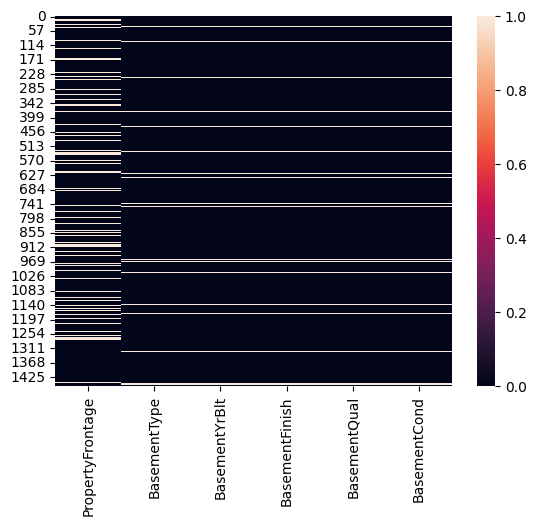

In [23]:
sns.heatmap(property_data[missing_05_20_percent.keys()].isnull())

In [24]:
#Missing value Imputation
missing_val_feature=Null_percent[Null_percent>0]
print("Total missing value features=", len(missing_val_feature))

Total missing value features= 19


In [25]:
Object_na_feat=missing_val_feature[missing_val_feature.keys().isin(Object_features)]
print("Total number of Categorical (Object) missing feature:", len(Object_na_feat))
Object_na_feat

Total number of Categorical (Object) missing feature: 16


Alley                   93.767123
ExteriorCladdingType     0.547945
BsmntFinish              2.534247
BsmntMaintenance         2.534247
BsmntVisibility          2.602740
BsmntFinRat1             2.534247
BsmntFinQual1            2.602740
Electrical               0.068493
QualFireplace           47.260274
BasementType             5.547945
BasementFinish           5.547945
BasementQual             5.547945
BasementCond             5.547945
PoolQC                  99.520548
BoundaryFeatures        80.753425
AddFeatures             96.301370
dtype: float64

In [26]:
int_na_feat=missing_val_feature[missing_val_feature.keys().isin(int_features)]
print("Total number of Integer missing feature: \n", int_na_feat)

Total number of Integer missing feature: 
 Series([], dtype: float64)


In [27]:
float_na_feat=missing_val_feature[missing_val_feature.keys().isin(float_features)]
print("Total number of float missing feature:", len(float_na_feat))
float_na_feat

Total number of float missing feature: 3


PropertyFrontage        17.739726
ExteriorCladdingArea     0.547945
BasementYrBlt            5.547945
dtype: float64

In [28]:
#Backup of data
df_missing=property_data.copy()
df_missing.shape

(1460, 81)

In [29]:
### Handling ExteriorCladdingType=0.547945
df_missing['ExteriorCladdingType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: ExteriorCladdingType, dtype: int64

In [30]:
ECT_mode=property_data['ExteriorCladdingType'].mode()[0]
df_missing['ExteriorCladdingType'].replace(np.nan,ECT_mode, inplace=True)
df_missing['ExteriorCladdingType'].isnull().sum()

0

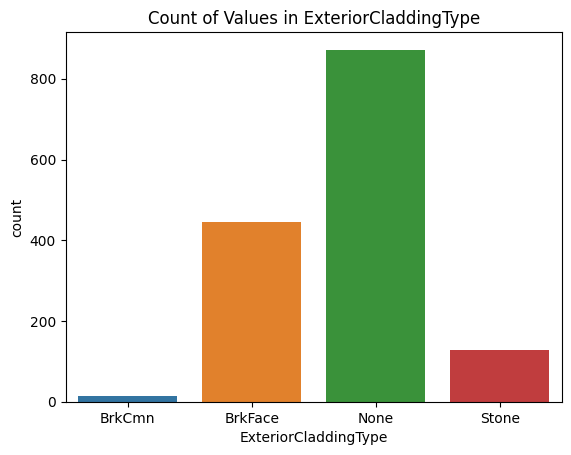

In [31]:
if 'ExteriorCladdingType' in df_missing.columns:
    df_missing['ExteriorCladdingType'] = pd.Categorical(df_missing['ExteriorCladdingType'])
    
    # Create the count plot
    sns.countplot(data=df_missing, x='ExteriorCladdingType')
    plt.title('Count of Values in ExteriorCladdingType')
    plt.show()
else:
    print("The 'ExteriorCladdingType' column does not exist in 'df_missing'.")

### We drop the columns due to very less data or all blank column approx.

In [32]:
df_missing.drop(columns=['Alley','PoolQC','BoundaryFeatures','AddFeatures'],inplace=True)

In [33]:
df_missing.shape

(1460, 77)

In [34]:
# Handling BsmntFinish=2.534247
df_missing['BsmntFinish'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmntFinish, dtype: int64

In [35]:
bsmnt_mode=property_data['BsmntFinish'].mode()[0]
df_missing['BsmntFinish'].replace(np.nan,bsmnt_mode, inplace=True)
df_missing['BsmntFinish'].isnull().sum()

0

In [36]:
# Handling BsmntMaintenance=2.534247
df_missing['BsmntMaintenance'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmntMaintenance, dtype: int64

In [37]:
bsmnt_maint=property_data['BsmntMaintenance'].mode()[0]
df_missing['BsmntMaintenance'].replace(np.nan,bsmnt_maint, inplace=True)
df_missing['BsmntMaintenance'].isnull().sum()

0

In [38]:
# Handling BsmntVisibility= 2.602740
df_missing['BsmntVisibility'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmntVisibility, dtype: int64

In [39]:
bsmnt_vis=property_data['BsmntVisibility'].mode()[0]
df_missing['BsmntVisibility'].replace(np.nan,bsmnt_vis, inplace=True)
df_missing['BsmntVisibility'].isnull().sum()

0

In [40]:
# Handling BsmntFinRat1= 2.534247
df_missing['BsmntFinRat1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmntFinRat1, dtype: int64

In [41]:
bsmnt_rat1=property_data['BsmntFinRat1'].mode()[0]
df_missing['BsmntFinRat1'].replace(np.nan,bsmnt_rat1, inplace=True)
df_missing['BsmntFinRat1'].isnull().sum()

0

In [42]:
# Handling BsmntFinQual1= 2.602740
df_missing['BsmntFinQual1'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmntFinQual1, dtype: int64

In [43]:
bsmnt_Qual1=property_data['BsmntFinQual1'].mode()[0]
df_missing['BsmntFinQual1'].replace(np.nan,bsmnt_Qual1, inplace=True)
df_missing['BsmntFinQual1'].isnull().sum()

0

In [44]:
# Handling Electrical= 0.068493
df_missing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [45]:
electrical=property_data['Electrical'].mode()[0]
df_missing['Electrical'].replace(np.nan,electrical, inplace=True)
df_missing['Electrical'].isnull().sum()

0

In [46]:
# Handling QualFireplace= 47.260274
df_missing['QualFireplace'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: QualFireplace, dtype: int64

In [47]:
qual_firplace=property_data['QualFireplace'].mode()[0]
df_missing['QualFireplace'].replace(np.nan,qual_firplace, inplace=True)
df_missing['QualFireplace'].isnull().sum()

0

In [48]:
# Handling BasementType= 5.547945
df_missing['BasementType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: BasementType, dtype: int64

In [49]:
base_type=property_data['BasementType'].mode()[0]
df_missing['BasementType'].replace(np.nan,base_type, inplace=True)
df_missing['BasementType'].isnull().sum()

0

In [50]:
# Handling BasementFinish= 5.547945
df_missing['BasementFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: BasementFinish, dtype: int64

In [51]:
base_finish=property_data['BasementFinish'].mode()[0]
df_missing['BasementFinish'].replace(np.nan,base_finish, inplace=True)
df_missing['BasementFinish'].isnull().sum()

0

In [52]:
# Handling BasementQual= 5.547945
df_missing['BasementQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: BasementQual, dtype: int64

In [53]:
base_qual=property_data['BasementQual'].mode()[0]
df_missing['BasementQual'].replace(np.nan,base_qual, inplace=True)
df_missing['BasementFinish'].isnull().sum()

0

In [55]:
# Handling BasementCond= 5.547945
df_missing['BasementCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: BasementCond, dtype: int64

In [56]:
base_cond=property_data['BasementCond'].mode()[0]
df_missing['BasementCond'].replace(np.nan,base_cond, inplace=True)
df_missing['BasementFinish'].isnull().sum()

0

### Indetify the outliers

<Axes: >

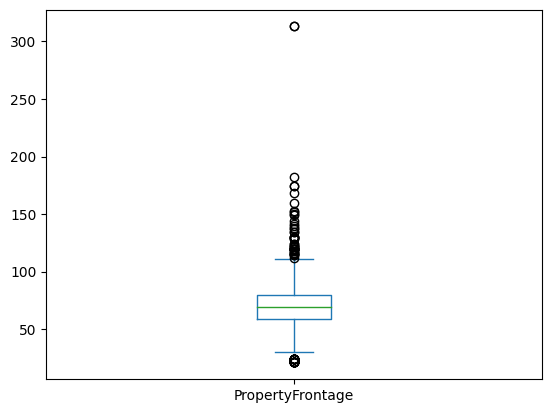

In [134]:
df_missing['PropertyFrontage'].plot(kind='box')

In [57]:
base_front=property_data['PropertyFrontage'].median()
df_missing['PropertyFrontage'].replace(np.nan,base_front, inplace=True)
df_missing['PropertyFrontage'].isnull().sum()

0

In [58]:
base_front=property_data['PropertyFrontage'].median()
df_missing['PropertyFrontage'].replace(np.nan,base_front, inplace=True)
df_missing['PropertyFrontage'].isnull().sum()

0

In [59]:
base_cladarea=0
df_missing['ExteriorCladdingArea'].replace(np.nan,base_cladarea, inplace=True)
df_missing['ExteriorCladdingArea'].isnull().sum()

0

In [60]:
base_yrblt=0
df_missing['BasementYrBlt'].replace(np.nan,base_yrblt, inplace=True)
df_missing['ExteriorCladdingArea'].isnull().sum()

0

In [61]:
df_missing.head()

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,PropertyShape,Elevation,Amenities,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,PropertyFooting,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,Heating,HeatingEfficiency,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementType,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Features Transformation

In [112]:
#Numerical to Categorical transformstion
feat_df_cov = ['YearBuilt', 'YearRemodAdd', 'BasementYrBlt','SaleMon','SaleYr']
for check_type in feat_df_cov:
    print(f"Data {check_type} type of features: {df_missing[check_type].dtype}")

Data YearBuilt type of features: object
Data YearRemodAdd type of features: object
Data BasementYrBlt type of features: object
Data SaleMon type of features: object
Data SaleYr type of features: object


In [113]:
for feat_cov in feat_df_cov:
    df_missing[feat_cov]=df_missing[feat_cov].astype(str)

In [114]:
df_missing['SaleMon']= df_missing['SaleMon'].astype(int)

ValueError: invalid literal for int() with base 10: 'Feb'

In [ ]:
#Converstion number to month
cal.month_abbr[12]
df_missing['SaleMon']=df_missing['SaleMon'].apply(lambda x: cal.month_abbr[x])

In [66]:
df_missing['SaleMon'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [67]:
df_missing.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

### Convert Categorical features into Numerical Features

#### Ordinal Encoding

In [115]:
ordinal_en_var=['ExterQual','ExterCond','BasementQual','BsmntFinish','BsmntMaintenance','BsmntVisibility','HeatingEfficiency',
                'BasementCond','PavedDrive','CentralAir','KitchenQual','QualFireplace','Functional']
print('Total number of features to convert in ordinal numeric format: ',len(ordinal_en_var))

Total number of features to convert in ordinal numeric format:  13


In [69]:
df_missing['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [97]:
#Converted categorical into numerical Features:
df_missing['ExteriorCladdingType']=df_missing['ExteriorCladdingType'].astype(cdt(categories=['None', 'BrkFace', 'Stone', 'BrkCmn'],ordered=True)).cat.codes
df_missing['ExterQual']=df_missing['ExterQual'].astype(cdt(categories=['Gd', 'TA', 'Ex', 'Fa'],ordered=True)).cat.codes
df_missing['ExterCond']=df_missing['ExterCond'].astype(cdt(categories=['TA', 'Gd', 'Fa', 'Po', 'Ex'],ordered=True)).cat.codes
df_missing['BasementQual']=df_missing['BasementQual'].astype(cdt(categories=['TA', 'Fa', 'Gd', 'Ex', 'Po'],ordered=True)).cat.codes
df_missing['BsmntFinish']=df_missing['BsmntFinish'].astype(cdt(categories=['Gd', 'TA', 'Ex', 'Fa'],ordered=True)).cat.codes
df_missing['BsmntMaintenance']=df_missing['BsmntMaintenance'].astype(cdt(categories=['TA', 'Gd', 'Fa', 'Po'],ordered=True)).cat.codes
df_missing['BsmntVisibility']=df_missing['BsmntVisibility'].astype(cdt(categories=['No', 'Gd', 'Mn', 'Av'],ordered=True)).cat.codes
df_missing['HeatingEfficiency']=df_missing['HeatingEfficiency'].astype(cdt(categories=['Ex', 'Gd', 'TA', 'Fa', 'Po'],ordered=True)).cat.codes
df_missing['BasementCond']=df_missing['BasementCond'].astype(cdt(categories=['TA', 'Fa', 'Gd', 'Po', 'Ex'],ordered=True)).cat.codes
df_missing['PavedDrive']=df_missing['PavedDrive'].astype(cdt(categories=['Y', 'N', 'P'],ordered=True)).cat.codes
df_missing['KitchenQual']=df_missing['KitchenQual'].astype(cdt(categories=['Gd', 'TA', 'Ex', 'Fa'],ordered=True)).cat.codes
df_missing['QualFireplace']=df_missing['QualFireplace'].astype(cdt(categories=['Gd', 'TA', 'Fa', 'Ex', 'Po'],ordered=True)).cat.codes
df_missing['Functional']=df_missing['Functional'].astype(cdt(categories=['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'],ordered=True)).cat.codes
df_missing['CentralAir']=df_missing['CentralAir'].astype(cdt(categories=['Y', 'N'],ordered=True)).cat.codes

In [98]:
df_missing['CentralAir'].value_counts()

-1    1460
Name: CentralAir, dtype: int64

In [99]:
#Check data information
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1460 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   PropertyShape         1460 non-null   object 
 7   Elevation             1460 non-null   object 
 8   Amenities             1460 non-null   object 
 9   Orientation           1460 non-null   object 
 10  Grade                 1460 non-null   object 
 11  Neighborhood          1460 non-null   object 
 12  Condition1            1460 non-null   object 
 13  Condition2            1460 non-null   object 
 14  BldgType              1460 non-null   object 
 15  PropertyStyle        

### On Hot Encoding for Nominal Categorical Data

In [104]:
df_encode=df_missing.copy()
df_encode.shape

(1460, 77)

In [103]:
sample_submission=df_missing.copy(['PropertySize','BedroomUpLev','SaleMon','YrSold','PropPrice'])

In [105]:
obj_feature=df_encode.select_dtypes(include='category').columns.tolist()
print("Total object data type features:", len(obj_feature))
print("\nobject data type features:",obj_feature)

Total object data type features: 0

object data type features: []


In [116]:
obj_feature=df_encode.select_dtypes(include='object').columns.tolist()
print("Total object data type features:", len(obj_feature))
print("\nobject data type features:",obj_feature)

Total object data type features: 30

object data type features: ['PropertyZone', 'Street', 'PropertyShape', 'Elevation', 'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'PropertyStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material', 'Roof2Material', 'PropertyFooting', 'BsmntFinRat1', 'BsmntFinQual1', 'Heating', 'Electrical', 'BasementType', 'BasementYrBlt', 'BasementFinish', 'SaleMon', 'SaleYr', 'SaleType', 'SaleCondn']


In [117]:
df_encode[obj_feature].head(2)

,PropertyZone,Street,PropertyShape,Elevation,Amenities,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,PropertyFooting,BsmntFinRat1,BsmntFinQual1,Heating,Electrical,BasementType,BasementYrBlt,BasementFinish,SaleMon,SaleYr,SaleType,SaleCondn
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,PConc,GLQ,Unf,GasA,SBrkr,Attchd,2003.0,RFn,Feb,2008,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,CBlock,ALQ,Unf,GasA,SBrkr,Attchd,1976.0,RFn,May,2007,WD,Normal


In [118]:
print('Shape of Feature before Encoding: ',df_encode.shape)

df_encode=pd.get_dummies(df_encode,columns=obj_feature,prefix=obj_feature, drop_first=False)

print('Shape of Feature After One hot Encoding: ',df_encode.shape)

Shape of Feature before Encoding:  (1460, 77)
Shape of Feature After One hot Encoding:  (1460, 513)


In [119]:
df_encode.head(2)

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,HeatingEfficiency,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,PropPrice,PropertyZone_C (all),PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Grvl,Street_Pave,PropertyShape_IR1,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_Bnk,Elevation_HLS,Elevation_Low,Elevation_Lvl,Amenities_AllPub,Amenities_NoSeWa,Orientation_Corner,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Gtl,Grade_Mod,Grade_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Fin,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,Ye

In [120]:
obj_feature=df_encode.select_dtypes(include='object').columns.tolist()
obj_feature

[]

### Split Data for Training & Testing

In [121]:
from sklearn.model_selection import train_test_split
x_train=df_encode.drop('PropPrice',axis=1)
y_train=df_encode['PropPrice']

x_test=df_encode.drop('PropPrice',axis=1)

print('Shape of x_train Data: ', x_train.shape)
print('Shape of y_train Data: ', y_train.shape)
print('Shape of x_test Data: ', x_test.shape)


Shape of x_train Data:  (1460, 512)
Shape of y_train Data:  (1460,)
Shape of x_test Data:  (1460, 512)


In [122]:
df_encode.head()

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,HeatingEfficiency,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,PropPrice,PropertyZone_C (all),PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Grvl,Street_Pave,PropertyShape_IR1,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_Bnk,Elevation_HLS,Elevation_Low,Elevation_Lvl,Amenities_AllPub,Amenities_NoSeWa,Orientation_Corner,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Gtl,Grade_Mod,Grade_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Fin,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,Ye

In [123]:
X_train,X_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=140)

### Features Scaling

In [125]:
sc=StandardScaler()
sc.fit(X_train)

x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

In [127]:
x_train_scaled[:3,:]

array([[ 1.61970129,  3.15054816, -0.47524372, ..., -0.11785113,
         0.46547467, -0.30094777],
       [-1.26775908, -0.85747877, -0.47524372, ..., -0.11785113,
         0.46547467, -0.30094777],
       [-1.68599189,  0.79288526,  0.12772686, ..., -0.11785113,
         0.46547467, -0.30094777]])

In [128]:
x_test_scaled[:3,:]

array([[-1.57257282,  0.08558639,  0.32871705, ..., -0.11785113,
         0.46547467, -0.30094777],
       [-0.50690619,  0.55711897, -0.02301579, ..., -0.11785113,
        -2.14834462, -0.30094777],
       [ 1.55354017, -0.85747877, -1.3796996 , ..., -0.11785113,
         0.46547467, -0.30094777]])

### Train ML Model

In [129]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [130]:
svr=SVR()
lr=LinearRegression()
sgd=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
mlpr=MLPRegressor()
xgbr=XGBRegressor()